**BLINKIT SALES ANALYSIS**

**BASIC DATA ANALYSIS TECHNIQUES***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px
from wordcloud import wordcloud
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/blinkit_data.csv')
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [2]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [3]:
df.shape

(8523, 12)

In [4]:
df.size

102276

In [6]:
df.ndim

2

In [5]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [7]:
df.value_counts()

Item Fat Content  Item Identifier  Item Type     Outlet Establishment Year  Outlet Identifier  Outlet Location Type  Outlet Size  Outlet Type        Item Visibility  Item Weight  Sales     Rating
reg               FDZ59            Baking Goods  2011                       OUT010             Tier 3                Small        Grocery Store      0.174111         6.630        166.8500  4.4       1
LF                DRA12            Soft Drinks   2017                       OUT035             Tier 2                Small        Supermarket Type1  0.000000         11.600       141.9154  4.0       1
                  DRD12            Soft Drinks   2022                       OUT018             Tier 3                Medium       Supermarket Type2  0.077508         6.960        92.3146   4.0       1
                  DRD25            Soft Drinks   2022                       OUT018             Tier 3                Medium       Supermarket Type2  0.079294         6.135        111.2860  4.3       1
reg               FDW09            Snack Foods   2000                       OUT013             Tier 3                High         Supermarket Type1  0.025899         13.650       81.1302   4.4       1
                                                                                                                                                                                                      ..
LF                DRE48            Soft Drinks   2017                       OUT035             Tier 2                Small        Supermarket Type1  0.017322         8.430        196.8768  4.0       1
                  DRE37            Soft Drinks   2022                       OUT018             Tier 3                Medium       Supermarket Type2  0.094603         13.500       187.0872  4.0       1
                  DRE25            Soft Drinks   2020                       OUT017             Tier 2                Medium       Supermarket Type1  0.073698         15.350       91.9120   5.0       1
                  DRD60            Soft Drinks   2022                       OUT018             Tier 3                Medium       Supermarket Type2  0.037384         15.700       179.7634  4.6       1
                  DRD49            Soft Drinks   2010                       OUT046             Tier 1                Small        Supermarket Type1  0.167831         9.895        237.4564  4.0       1
Name: count, Length: 7060, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.describe(include='all')

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
count,8523,8523,8523,8523.000000,8523,8523,8523,8523,8523.000000,7060.000000,8523.000000,8523.000000
unique,5,1559,16,NaN,10,3,3,4,NaN,NaN,NaN,NaN
top,Low Fat,FDW13,Fruits and Vegetables,NaN,OUT027,Tier 3,Medium,Supermarket Type1,NaN,NaN,NaN,NaN
freq,5089,10,1232,NaN,935,3350,3631,5577,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2010.831867,NaN,NaN,NaN,NaN,0.066132,12.857645,140.992782,3.965857
std,NaN,NaN,NaN,8.371760,NaN,NaN,NaN,NaN,0.051598,4.643456,62.275067,0.605651
min,NaN,NaN,NaN,1998.000000,NaN,NaN,NaN,NaN,0.000000,4.555000,31.290000,1.000000
25%,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN,0.026989,8.773750,93.826500,4.000000
50%,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,0.053931,12.600000,143.012800,4.000000
75%,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,0.094585,16.850000,185.643700,4.200000


In [10]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


**NULL VALUE CHECK**

In [11]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


**UNIVARIATE ANALYSIS**

In [12]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

**SALES INFORMATION**

In [13]:

# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# No of Items Sold
no_of_items_sold = df['Sales'].count()

# Average Ratings
avg_ratings = df['Rating'].mean()

# Display
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Ratings: {avg_ratings:,.0f}")

Total Sales: $1,201,681
Average Sales: $141
No of Items Sold: 8,523
Average Ratings: 4


**ITEM TYPE WISE SALES**

In [14]:
import matplotlib
import importlib
import matplotlib.pyplot as plt

# reload the pyplot module to restore original functions
importlib.reload(matplotlib.pyplot)

# verify restored
print("plt.figure restored:", callable(plt.figure))


plt.figure restored: True


In [16]:
dftop10=df.sort_values(by='Sales', ascending=False)

Text(0.5, 1.0, 'top 10 item type sales')

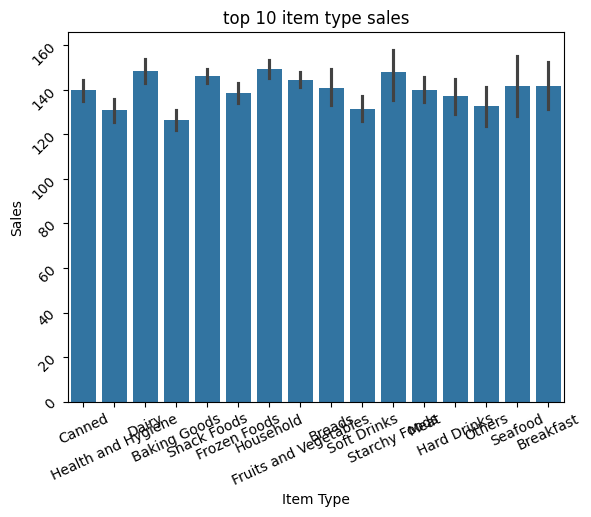

In [17]:
sns.barplot(x='Item Type',y='Sales',data=dftop10)
plt.xticks(rotation=25)
plt.yticks(rotation=45)
plt.title('top 10 item type sales')

Text(0.5, 1.0, 'item type fat content')

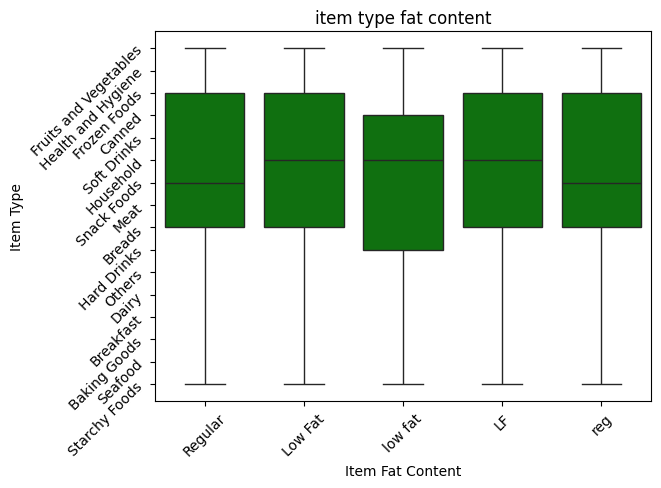

In [21]:
sns.boxplot(x='Item Fat Content',y='Item Type',data=df,color='green')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('item type fat content')

In [ ]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

Text(0.5, 1.0, 'weighted item type sales')

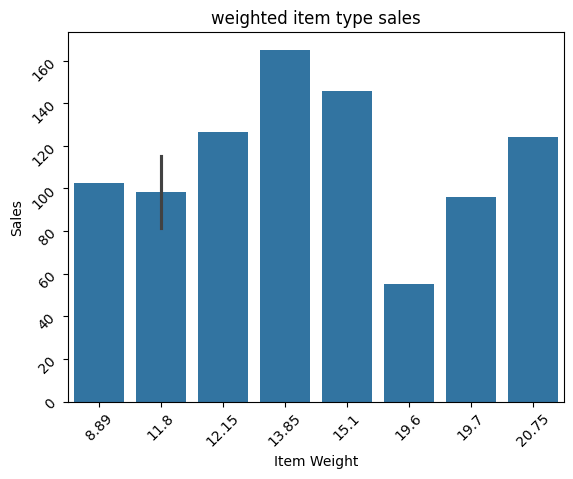

In [22]:
sns.barplot(x='Item Weight',y='Sales',data=df.head(10))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('weighted item type sales')


In [ ]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

<Axes: xlabel='Outlet Establishment Year', ylabel='Sales'>

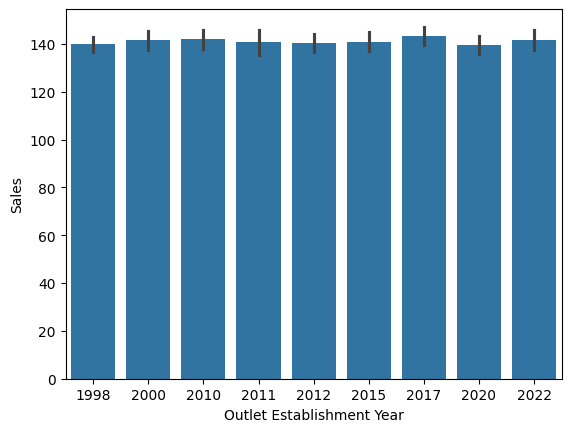

In [ ]:
#outlet establishmnent year wise sales
sns.barplot(x='Outlet Establishment Year',y='Sales',data=df)

In [ ]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [ ]:
# Total Sales by Fat Content
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat,
        labels=sales_by_fat.index,
        autopct='%.1f%%',
        startangle=90)

plt.title('Sales by Fat Content')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

TOTAL SALES BY ITEM TYPE

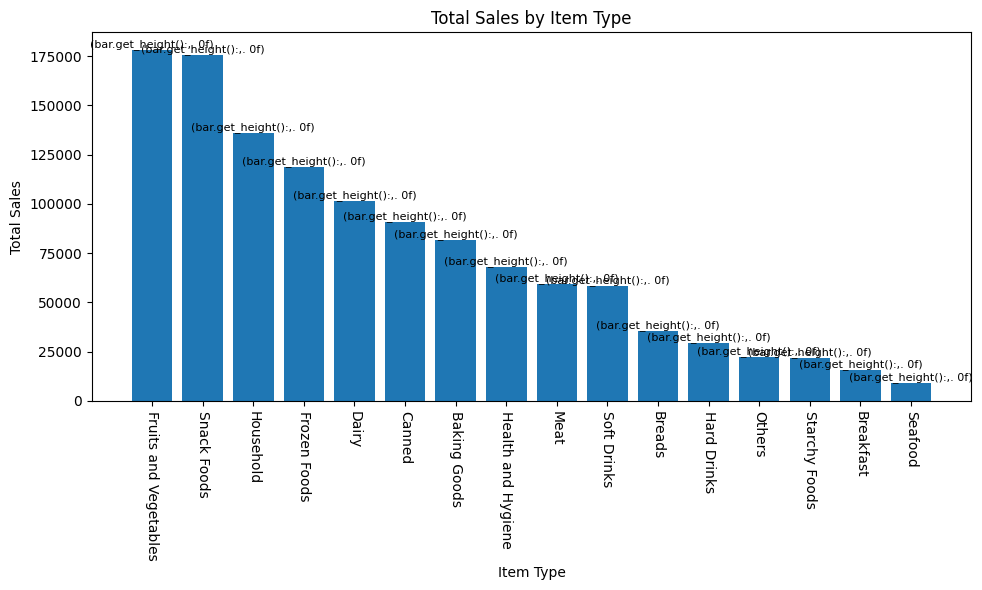

In [24]:
sales_by_type = df.groupby('Item Type') ['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
         f'(bar.get_height():,. 0f)', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()


OUTLET TIER BY ITEM FAT CONTENT

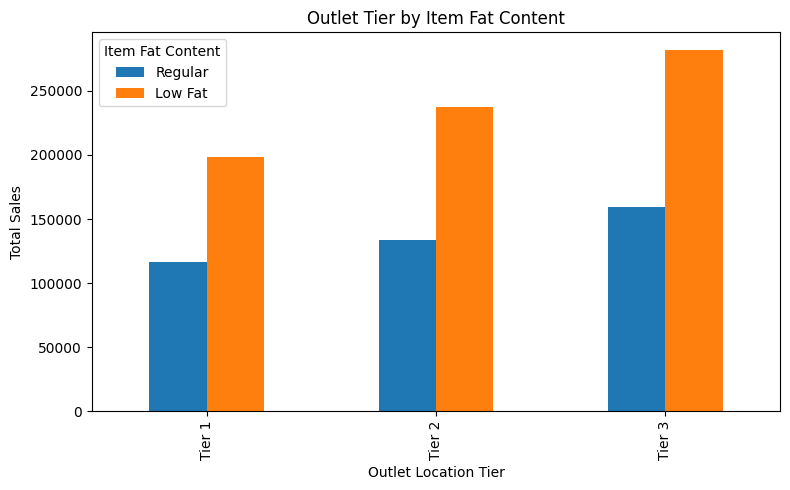

In [23]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]  # Optional filtering order

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

Total Sales By Outlet Establishment Year

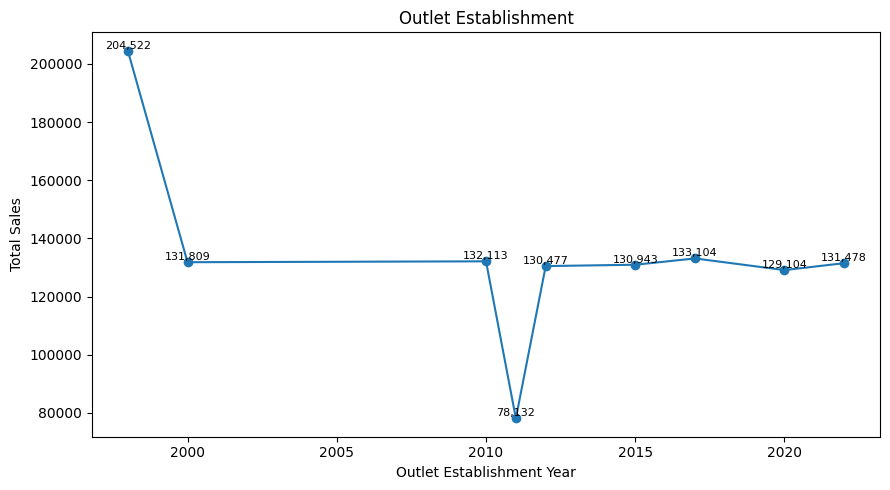

In [25]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

SALES BY OUTLET SIZE

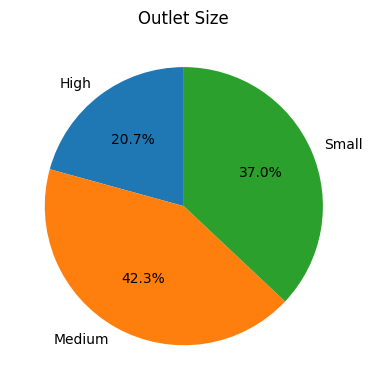

In [26]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size,
        labels=sales_by_size.index,
        autopct='%1.1f%%',
        startangle=90)

plt.title('Outlet Size')
plt.tight_layout()
plt.show()

SALERS BY LOCATION

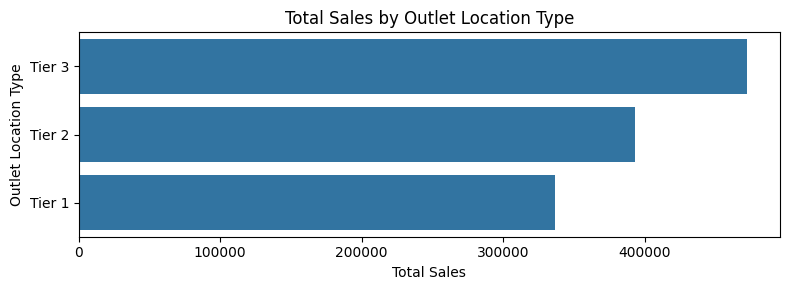

In [27]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))  # Smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()  # Ensures layout fits without scroll
plt.show()